# 전이학습(transfer learning)
- 방대한 자료를 통해 미리 학습한 가중치(weight) 값을 가져와 내 프로젝트에 사용하는 방법

## 소규모 데이터셋으로 만드는 강력한 학습 모델

In [17]:
pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions

     ------------------------------------- 479.8/479.8 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     --------------------------------------- 20.9/20.9 MB 81.8 MB/s eta 0:00:00
     ------------------------------------- 861.7/861.7 kB 56.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for jupyter_nbextensions_configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465849 sha256=4bf1f11a3b91df3f7d2c3e4bcf742f3bec18c859e1ff5cc4007ee3d1a415d52e
  Stored in directory: c:\users\nayou\appdata\local\pip\cache\wheels\94\62\cd\233da8580d4e1228ab3fbede758ab1b97174bf9d9cea095049
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963413 sha256=4945a082ca79a7d45efde21f047e752f0a5890797a52e0a644342ed85d6e9f14
  Stored in directory: c:\users\nayou\a

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
! jupyter contrib nbextension install --user
! jupyter nbextensions_configurator enable --user

[I 16:28:38 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 16:28:38 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 16:28:38 InstallContribNbextensionsApp] Installing C:\Users\nayou\anaconda3\envs\py39\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 16:28:38 InstallContribNbextensionsApp] Making directory: C:\Users\nayou\AppData\Roaming\jupyter\nbextensions\addbefore\
[I 16:28:38 InstallContribNbextensionsApp] Copying: C:\Users\nayou\anaconda3\envs\py39\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\addbefore.yaml -> C:\Users\nayou\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 16:28:38 InstallContribNbextensionsApp] Copying: C:\Users\nayou\anaconda3\envs\py39\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore\icon.png -> C:\Users\nayou\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png

Enabling: jupyter_nbextensions_configurator
- Writing config: C:\Users\nayou\.jupyter
    - Validating...
      jupyter_nbextensions_configurator 0.4.1 ok
Enabling notebook nbextension nbextensions_configurator/config_menu/main...
Enabling tree nbextension nbextensions_configurator/tree_tab/main...


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

In [2]:
!pip install Scipy

In [4]:
# ImageDataGenerator() : 주어진 데이터를 이용해 변형된 이미지를 만들어 학습셋에 포함시키는 기능 제공
# flow_from_directory() : 폴더에 저장된 데이터 불러오기

# 학습셋 데이터 수 늘리기
train_datagen = ImageDataGenerator(rescale=1./255,  # 이미지의 크기 변경
                                   horizontal_flip=True,  # 이미지를 수직으로 뒤집기
                                   vertical_flip=True,  # 이미지를 수평으로 뒤집기
                                   width_shift_range=0.1,  # 정해진 범위 안에서 그림을 수평으로 랜덤하게 평행 이동
                                   height_shift_range=0.1,  # 정해진 범위 안에서 그림을 수직으로 랜덤하게 평행 이동
                                   rotation_range=5,  # 정해진 각도만큼 이미지를 회전
                                   shear_range=0.7,  # 좌표 하나를 고정시키고 다른 몇 개의 좌표를 이동시키는 변환
                                   zoom_range=1.2,  # 정해진 범위 안에서 축소 또는 확대
                                   fill_mode='nearest'  # 이미지를 축소 또는 회전하거나 이동할 때 생기는 빈 공간을 어떻게 채울지 결정. nearest : 가장 비슷한 색으로 채워짐
                                  )

In [5]:
# 테스트셋은 정규화만 진행
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
# 학습셋 이미지 불러오기
train_generator = train_datagen.flow_from_directory(
'./data/train',  # 학습셋이 있는 폴더 위치
target_size=(150, 150),  # 이미지 크기
batch_size=5,
class_mode='binary')  # 치매/정상 이진 분류이므로 바이너리 모드로 실행

Found 160 images belonging to 2 classes.


In [11]:
# 테스트셋 이미지 불러오기
test_generator = test_datagen.flow_from_directory(
'./data/test',  # 테스트셋이 있는 폴더 위치
target_size=(150, 150),
batch_size=5,
class_mode='binary')

Found 120 images belonging to 2 classes.


In [12]:
# CNN 모델 만들기
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
# 모델 실행 옵션 설정
    # 케라스 API의 optimizers 클래스를 활용해 학습률을 따로 지정
    # 조기 중단 설정하고 model.fit() 실행 : 학습셋과 테스트셋을 조금 전 만들어준 train_generator와 test_generator로 지정

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate= 0.0002), metrics=['accuracy'])

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

with tf.device('/GPU:0'):
    history = model.fit(train_generator,
                       epochs=100,
                       validation_data=test_generator,
                       validation_steps=10,
                       callbacks=[early_stopping_callback])

Epoch 1/100
32/32 [==============================] - 5s 31ms/step - loss: 0.7075 - accuracy: 0.4938 - val_loss: 0.6939 - val_accuracy: 0.4400
Epoch 2/100
32/32 [==============================] - 1s 19ms/step - loss: 0.6895 - accuracy: 0.5562 - val_loss: 0.6967 - val_accuracy: 0.4000
Epoch 3/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6905 - accuracy: 0.4938 - val_loss: 0.6907 - val_accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6897 - accuracy: 0.5312 - val_loss: 0.6636 - val_accuracy: 0.6000
Epoch 5/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6913 - accuracy: 0.5125 - val_loss: 0.6862 - val_accuracy: 0.8400
Epoch 6/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6924 - accuracy: 0.5188 - val_loss: 0.6825 - val_accuracy: 0.7400
Epoch 7/100
32/32 [==============================] - 1s 18ms/step - loss: 0.6862 - accuracy: 0.5250 - val_loss: 0.6752 - val_accuracy: 0.5400
Epoch 

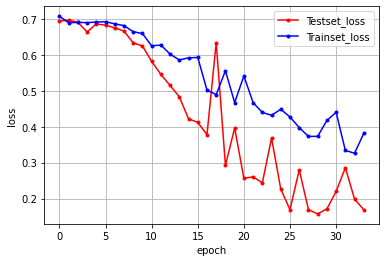

In [16]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_vloss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 전이 학습으로 모델 성능 극대화하기

- 대용량의 데이터를 이용해 학습한 가중치 정보를 가져와 내 모델에 적용한 후 프로젝트를 계속해서 진행할 수 있음
- 대규모 데이터셋으로 학습된 기존의 네트워크를 불러옴 > CNN 모데르이 앞쪽을 이 네트워크로 채움 > 뒤쪽 레이어에서 내 프로젝트와 연결 > 두 네트워크가 잘 맞물리게끔 미세 조정(fine tuning)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# 학습셋의 변형을 설정하는 부분
train_datagen = ImageDataGenerator(rescale=1./255, 
                                  horizontal_flip=True,
                                  width_shift_range=0.1, 
                                  height_shift_range=0.1)

train_generator = train_datagen.flow_from_directory(
                                './data/train',
                                target_size=(150,150),
                                batch_size=5,
                                class_mode='binary')

Found 160 images belonging to 2 classes.


In [10]:
# 테스트셋의 정규화 설정
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
                                './data/test',
                                target_size=(150,150),
                                batch_size=5,
                                class_mode='binary')

Found 120 images belonging to 2 classes.


In [5]:
# VGG16 모델 불러오기
# include_top : VGG16의 마지막 층, 즉 분류를 담당하는 곳을 불러올지 말지를 정하는 옵션
    # 우리가 만든 로컬 네트워크를 연결할 것이므로 False로 설정
# 불러온 부분은 새롭게 학습되는 것이 아니므로 학습되지 않도록 transfer_model.trainable 옵션 False로 설정
    
transfer_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
transfer_model.trainable = False
transfer_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [3]:
# 위에서 학습 가능한 파라미터(Trainable params) 없음 확인
# 우리의 로컬 네트워크 만들기

# 첫번째 층은 앞서 불러온 transfer_model을 그대로 불러온 후 최종 예측하는 층을 추가함
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                524352    
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation_1 (Activation)   (None, 1)                 0

In [7]:
# 모델의 실행 옵션 설정
finetune_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

# 학습 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [11]:
# 모델 실행
with tf.device('/GPU:0'):
    history = finetune_model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    validation_steps=10,
    callbacks=[early_stopping_callback])

Epoch 1/20
32/32 [==============================] - 6s 28ms/step - loss: 0.6857 - accuracy: 0.5938 - val_loss: 0.5678 - val_accuracy: 0.8000
Epoch 2/20
32/32 [==============================] - 1s 19ms/step - loss: 0.5437 - accuracy: 0.7750 - val_loss: 0.4874 - val_accuracy: 0.8000
Epoch 3/20
32/32 [==============================] - 1s 18ms/step - loss: 0.4916 - accuracy: 0.7875 - val_loss: 0.4548 - val_accuracy: 0.7600
Epoch 4/20
32/32 [==============================] - 1s 18ms/step - loss: 0.4135 - accuracy: 0.8375 - val_loss: 0.3635 - val_accuracy: 0.9200
Epoch 5/20
32/32 [==============================] - 1s 18ms/step - loss: 0.3224 - accuracy: 0.9062 - val_loss: 0.4129 - val_accuracy: 0.8200
Epoch 6/20
32/32 [==============================] - 1s 22ms/step - loss: 0.3432 - accuracy: 0.8438 - val_loss: 0.2574 - val_accuracy: 0.9600
Epoch 7/20
32/32 [==============================] - 1s 18ms/step - loss: 0.2823 - accuracy: 0.9125 - val_loss: 0.2467 - val_accuracy: 0.9400
Epoch 8/20
32

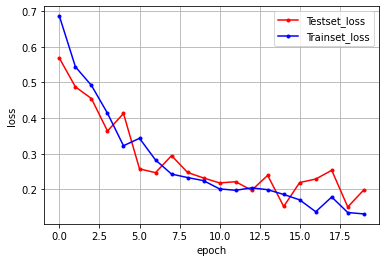

In [12]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 시각화
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드를 주고 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 전이 학습을 사용하지 않았던 이전보다 더 높은 정확도로 출발하는 것을 볼 수 있고, 학습 속도도 빨라진 것이 확인됨
# 그래프의 변화 추이가 안정적임을 확인할 수 있음